In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Download the fashion_mnist data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Visualize the data

X train shape: (60000, 28, 28) y train shape: (60000,)
60000 train set
10000 test set
y = 0 T-shirt/top


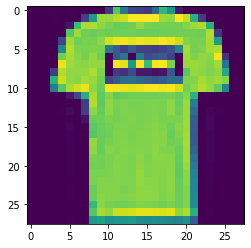

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("X train shape:", X_train.shape, "y train shape:", y_train.shape)

# Print the number of training and test datasets
print(X_train.shape[0], 'train set')
print(X_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 1
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Show one of the images from the training dataset
plt.imshow(X_train[img_index])

## Data normalization

Normalize the data dimensions between 0 and 1

In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
X_train.max()

1.0

## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.


In [6]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
X_train, X_valid = X_train[5000:], X_train[:5000] 
y_train, y_valid = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(X_train.shape[0], 'train set')
print(X_valid.shape[0], 'validation set')
print(X_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the baseline

In [7]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(X_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5319 - accuracy: 0.8057
Epoch 00001: val_loss improved from inf to 0.38285, saving model to model.weights.best.hdf5
860/860 [==============================] - 36s 41ms/step - loss: 0.5318 - accuracy: 0.8057 - val_loss: 0.3828 - val_accuracy: 0.8606
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.3662 - accuracy: 0.8658
Epoch 00002: val_loss improved from 0.38285 to 0.30663, saving model to model.weights.best.hdf5
860/860 [==============================] - 169s 196ms/step - loss: 0.3662 - accuracy: 0.8658 - val_loss: 0.3066 - val_accuracy: 0.8918
Epoch 3/10
860/860 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.8809
Epoch 00003: val_loss improved from 0.30663 to 0.27763, saving model to model.weights.best.hdf5
860/860 [==============================] - 34s 40ms/step - loss: 0.3232 - accuracy: 0.8809 - val_loss: 0.2776 - val_accuracy: 0.8974
Epoch 4/10
859/860 [=======

## Load Model with the best validation accuracy

In [10]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## Test Accuracy

In [11]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.914900004863739


## Results Dict
用个字典记录结果

In [26]:
import pandas as pd

In [12]:
results_dict = {}
base_params = [(64,2),(32,2), (0.3,0.3)]  # 基础模型参数
results_dict['baseline'] = {'parameters':base_params,'accuracy':score[1]}

## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

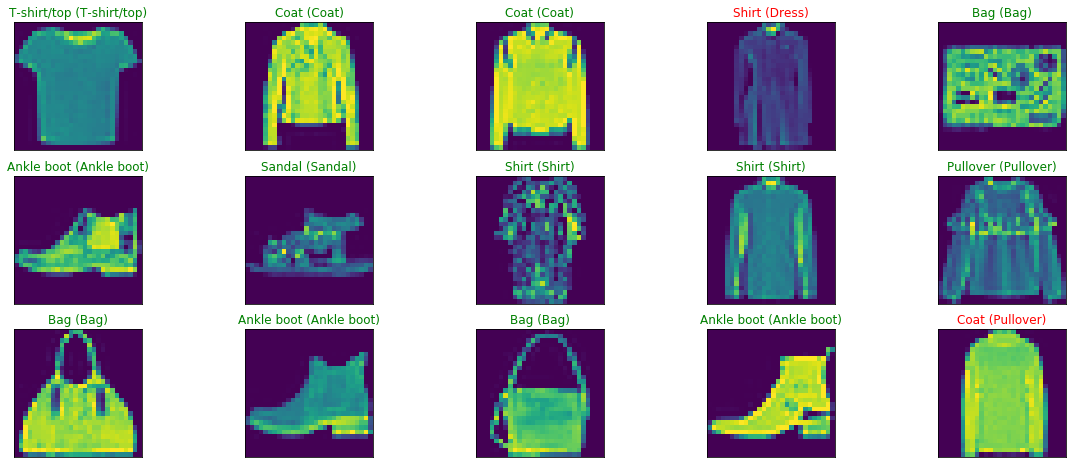

In [13]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Architecture Comparison

In [22]:
# 为了能够快速地实现最后的结果,构建函数
from tensorflow.python.framework import ops
def getcnnresult(modelname,baselayer,extralayer = None,kernels_poolings =(2,2)):
    
    ops.reset_default_graph() # 加载新模型前把老的删掉，防止越来越慢
    print( 'Model Name:',modelname)
    filters1,kernels_convolution1= baselayer[0]
    filters2,kernels_convolution2 = baselayer[1]
    droupout1,dropout2 = baselayer[2]
    kernels_pooling1,kernels_pooling2 = kernels_poolings   
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=filters1, kernel_size=kernels_convolution1, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=kernels_pooling1 ))
    model.add(tf.keras.layers.Dropout(droupout1))
    model.add(tf.keras.layers.Conv2D(filters=filters2, kernel_size=kernels_convolution2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=kernels_pooling2 ))
    model.add(tf.keras.layers.Dropout(dropout2))
    if extralayer:
        filters1,kernels_convolution1  = extralayer[0]
        filters2,kernels_convolution2= extralayer[1]
        droupout1,dropout2 = extralayer[2]
        model.add(tf.keras.layers.Conv2D(filters=filters1, kernel_size=kernels_convolution1, padding='same', activation='relu')) 
        model.add(tf.keras.layers.MaxPooling2D(pool_size=kernels_pooling1 ))
        model.add(tf.keras.layers.Dropout(droupout1))
        model.add(tf.keras.layers.Conv2D(filters=filters2, kernel_size=kernels_convolution2, padding='same', activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=kernels_pooling2))
        model.add(tf.keras.layers.Dropout(dropout2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # Take a look at the model summary
    model.summary()
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    checkpointer = ModelCheckpoint(filepath='{}.weights.best.hdf5'.format(modelname), verbose = 0, save_best_only=True)
    model.fit(X_train,
             y_train,
             batch_size=64,
             epochs=10,
             validation_data=(X_valid, y_valid),
             callbacks=[checkpointer])
    model.load_weights('{}.weights.best.hdf5'.format(modelname))
    score = model.evaluate(X_test, y_test, verbose=0)
    # Print test accuracy
    print('\n', 'Test accuracy:', score[1])
    return score[1]

### Combination of number of filters for (32,16)

In [15]:
params1 = [(32,2),(16,2),(0.3,0.3)]
model_name = 'Architecture 1'
test_score = getcnnresult(model_name,params1)
results_dict[model_name] = {'parameters':params1 ,'accuracy':test_score}

Model Name: Architecture 1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            

In [36]:
base_params

[(64, 2), (32, 2), (0.3, 0.3)]

### Combination of number of filters for (64,64)

In [16]:
params2 = [(64,2),(64,2),(0.3,0.3)]
model_name = 'Architecture 2'
test_score = getcnnresult(model_name,params2)
results_dict[model_name] = {'parameters':params2 ,'accuracy':test_score}

Model Name: Architecture 2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            

In [ ]:
params1

### Combination of combinations of kernels for (5, 3)

In [17]:
params3 = [(64,5),(32,3),(0.3,0.3)]
model_name = 'Architecture 3'
test_score = getcnnresult(model_name,params3)
results_dict[model_name] = {'parameters':params3 ,'accuracy':test_score}

Model Name: Architecture 3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            

### Combination of combinations of kernels for (3, 2)

In [18]:
params4 = [(64,3),(32,2),(0.3,0.3)]
model_name = 'Architecture 4'
test_score = getcnnresult(model_name,params4)
results_dict[model_name] = {'parameters':params4 ,'accuracy':test_score}

Model Name: Architecture 4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            

### Dropout probability values for (0.3, 0.25)

In [19]:
params5 = [(64,2),(32,2),(0.3,0.25)]
model_name = 'Architecture 5'
test_score = getcnnresult(model_name,params5)
results_dict[model_name] = {'parameters':params5 ,'accuracy':test_score}

Model Name: Architecture 5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            

### Dropout probability values for (0.25, 0.25)

In [20]:
params6 = [(64,2),(32,2),(0.25,0.25)]
model_name = 'Architecture 6'
test_score = getcnnresult(model_name,params6)
results_dict[model_name] = {'parameters':params6 ,'accuracy':test_score}

Model Name: Architecture 6
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            

### Extra layer for [(64,2),(32,2), (0.3,0.3)]

In [24]:
params7 = [(64,2),(32,2), (0.3,0.3)]
model_name = 'Architecture 7(extra layer)'
test_score = getcnnresult(model_name,base_params,params7)
results_dict[model_name] = {'parameters':params7 ,'accuracy':test_score}

Model Name: Architecture 7(extra layer)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D

In [23]:
results_dict[model_name] = {'parameters':params7 ,'accuracy':test_score}

接下来是4个 architectures with multiple simultaneous modifications

### [(32,2),(16,2),(0.3,0.3)]

In [25]:
params8 = [(32,2),(16,2),(0.3,0.3)]
model_name = 'Architecture 8'
test_score = getcnnresult(model_name,params8)
results_dict[model_name] = {'parameters':params8 ,'accuracy':test_score}

Model Name: Architecture 8
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            

### [(32,5),(16,5),(0.2,0.2)]

In [26]:
params9 = [(32,5),(16,5),(0.2,0.2)]
model_name = 'Architecture 9'
test_score = getcnnresult(model_name,params9)
results_dict[model_name] = {'parameters':params9 ,'accuracy':test_score}

Model Name: Architecture 9
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            

### [(128,2),(64,2),(0.3,0.3)]

In [27]:
params10 = [(128,2),(64,2),(0.3,0.3)]
model_name = 'Architecture 10'
test_score = getcnnresult(model_name,params10)
results_dict[model_name] = {'parameters':params10 ,'accuracy':test_score}

Model Name: Architecture 10
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)           

### [(128,3),(64,3),(0.3,0.3),(3,3)]

In [29]:
params11 = [(128,3),(64,3),(0.3,0.3)]
model_name = 'Architecture 11'
test_score = getcnnresult(model_name,params11,kernels_poolings = (3,3))
params11.append((3,3))
results_dict[model_name] = {'parameters':params11 ,'accuracy':test_score}

Model Name: Architecture 11
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)           

In [30]:
# 最终结果表
import pandas as pd
results = pd.DataFrame(results_dict).T
results

,parameters,accuracy
baseline,"[(64, 2), (32, 2), (0.3, 0.3)]",0.9149
Architecture 1,"[(32, 2), (16, 2), (0.3, 0.3)]",0.904
Architecture 2,"[(64, 2), (64, 2), (0.3, 0.3)]",0.9182
Architecture 3,"[(64, 5), (32, 3), (0.3, 0.3)]",0.9174
Architecture 4,"[(64, 3), (32, 2), (0.3, 0.3)]",0.9165
Architecture 5,"[(64, 2), (32, 2), (0.3, 0.25)]",0.9149
Architecture 6,"[(64, 2), (32, 2), (0.25, 0.25)]",0.9154
Architecture 7(extra layer),"[(64, 2), (32, 2), (0.3, 0.3)]",0.8742
Architecture 8,"[(32, 2), (16, 2), (0.3, 0.3)]",0.9043
Architecture 9,"[(32, 5), (16, 5), (0.2, 0.2)]",0.9175
